# Introduction

In [447]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

In [448]:
data = pd.read_csv(r'C:\Users\mikel\OneDrive\Desktop\Python\Datasets\AmesHousing.txt',delimiter='\t')

In [449]:
# Create a function named transform_features() 
# returns the train data frame.
def transform_features(data):
    return data

In [450]:
# Create a function named select_features() 
# returns the Gr Liv Area and SalePrice columns from the train data frame
def select_features(data):
    return data[['Gr Liv Area','SalePrice']]


# Transform Features

In [451]:
# Trains a model using all numerical columns except the SalePrice column (the target column) 
# from the data frame returned from select_features()
# Create a function named transform_features() 
# Returns the train data frame.
def transform_features(data):
    return data
# Create a function named select_features() 
# returns the Gr Liv Area and SalePrice columns from the train data frame
def select_features(data):
    return data[['Gr Liv Area','SalePrice']]
# Trains a model using all numerical columns except the SalePrice column (the target column) 
# from the data frame returned from select_features()

def train_and_test(data):
    train = data[:1460]
    test = data[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    
    numeric_train = train.select_dtypes(include=['integer','float'])
    numeric_test = test.select_dtypes(include=['integer','float'])
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

print('RMSE value is '+ str(rmse))

RMSE value is 57088.25161263909


# Feature Engineering
Handle missing values:
    - All columns:
        - Drop any with 5% or more missing values for now.
    - Text columns:
        - Drop any with 1 or more missing values for now.
    - Numerical columns:
        - For columns with missing values, fill in with the most common value in that column
1: All columns: Drop any with 5% or more missing values for now.

In [452]:
## Series object: column name -> number of missing values
num_missing = data.isnull().sum()
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [453]:
# Filter Series to columns containing >5% missing values
drop_missing_cols = num_missing[num_missing>len(data)/20]
drop_missing_cols

Lot Frontage      490
Alley            2732
Fireplace Qu     1422
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Pool QC          2917
Fence            2358
Misc Feature     2824
dtype: int64

In [454]:
data = data.drop(drop_missing_cols.index,axis=1)
data

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,470.0,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,2.0,582.0,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,2.0,506.0,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,2.0,608.0,Y,237,152,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,442.0,Y,140,60,0,0,0,0,0,6,2010,WD,Normal,189000


2: Text columns: Drop any with 1 or more missing values for now.

In [455]:
## Series object: column name -> number of missing values
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum()
text_mv_counts

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [456]:
## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
drop_missing_cols_2

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64

In [457]:
#Dataframe with no missing text/object values
data = data.drop(drop_missing_cols_2.index,axis=1)
data

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,602.0,0.0,324.0,926.0,GasA,Ex,Y,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,470.0,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,616.0,0.0,722.0,1338.0,GasA,Ex,Y,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,2.0,582.0,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,263.0,0.0,1017.0,1280.0,GasA,Ex,Y,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,2.0,506.0,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,1180.0,0.0,415.0,1595.0,GasA,Ex,Y,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,2.0,608.0,Y,237,152,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0.0,0.0,994.0,994.0,GasA,Gd,Y,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,442.0,Y,140,60,0,0,0,0,0,6,2010,WD,Normal,189000


3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [458]:
## Compute column-wise missing value counts

In [459]:
num_missing = data.select_dtypes(include=['int','float']).isnull().sum()
num_missing

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [460]:
fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [461]:
import statistics as st

In [462]:
fixable_numeric_cols.mode()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [463]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [464]:
# Nested Loop Method
for i,j in enumerate(fixable_numeric_cols):
    i = fixable_numeric_cols.index[i]
    print('\n')
    j = data[i].mode()
    print(i,':'+ str(j))



BsmtFin SF 1 :0    0.0
dtype: float64


BsmtFin SF 2 :0    0.0
dtype: float64


Bsmt Unf SF :0    0.0
dtype: float64


Total Bsmt SF :0    0.0
dtype: float64


Garage Cars :0    2.0
dtype: float64


Garage Area :0    0.0
dtype: float64


Bsmt Full Bath :0    0.0
dtype: float64


Bsmt Half Bath :0    0.0
dtype: float64


Mas Vnr Area :0    0.0
dtype: float64


In [465]:
## Use `pd.DataFrame.fillna()` to replace missing values.
data = data.fillna(replacement_values_dict)

In [466]:
## Verify that every column has 0 missing values
data.isnull().sum().value_counts()

0    64
dtype: int64

In [467]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [468]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [469]:
# Create New columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

# Drop rows with negative values for both of these new features
data = data.drop([1702,2180,2181],axis=0)

## No Longer need original year columns
data = data.drop(['Year Built','Year Remod/Add'],axis=1)

Drop columns that:

    - that aren't useful for ML
    - leak data about the final sale, read more about columns

In [470]:
## Drop columns that aren't useful for ML
data = data.drop(['PID','Order'],axis=1)

## Drop columns that leak info about the final sale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"],axis=1)

# Updated Transform Features

In [471]:
def transform_features(data):
    num_missing = data.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(data)/20)].sort_values()
    data = data.drop(drop_missing_cols.index,axis=1)
    
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index,axis=1)
    
    num_missing = data.select_dtypes(include=['integer','float']).isnull().sum().sort_values()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    data = data.fillna(replacement_values_dict)
    
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    data = data.drop([1702,2180,2181],axis = 0)
    
    data = data.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return data

def select_features(data):
    return data[["Gr Liv Area", "SalePrice"]]

def train_and_test(data):  
    train = data[:1460]
    test = data[1460:]
    
    ## pd.DataFrame.select_dtypes()` to specify column types
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

data = pd.read_csv(r'C:\Users\mikel\OneDrive\Desktop\Python\Datasets\AmesHousing.txt',delimiter='\t')
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

print('RMSE: ' + str(rmse))

RMSE: 55275.367312413066


# Feature Selection

In [472]:
numerical_df = transform_df.select_dtypes(include=['integer','float'])
numerical_df

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12
5,60,9978,6,6,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,2010,195500,12,12
6,120,4920,8,5,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,1.0,0.0,2,0,2,1,6,0,2.0,582.0,0,0,170,0,0,0,0,2010,213500,9,9
7,120,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,2010,191500,18,18
8,120,5389,8,5,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,1.0,0.0,2,0,2,1,5,1,2.0,608.0,237,152,0,0,0,0,0,2010,236500,15,14
9,60,7500,7,5,0.0,0.0,0.0,994.0,994.0,1028,776,0,1804,0.0,0.0,2,1,3,1,7,1,2.0,442.0,140,60,0,0,0,0,0,2010,189000,11,11


In [473]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice 

In [474]:
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

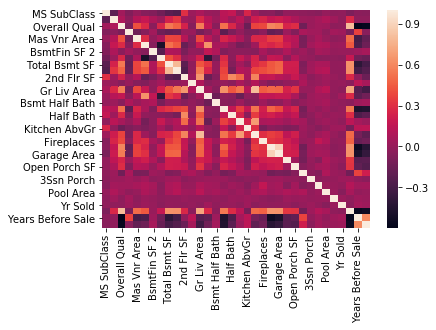

In [475]:
# Ignore
abs_corr =  numerical_df.corr()
abs_corr[abs_corr > 0.4]
sns.heatmap(abs_corr)

In [476]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

In [477]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]


- Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [478]:
## Isolate categorical cols
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [479]:
# Unique vales in categorical cols
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [480]:
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
drop_nonuniq_cols

Index(['Exterior 1st', 'Exterior 2nd', 'Neighborhood'], dtype='object')

In [481]:
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)
transform_df

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,Gable,CompShg,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13,12
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,Gable,CompShg,20.0,TA,TA,PConc,602.0,926.0,GasA,Ex,Y,926,1604,2,Gd,7,Typ,1,2.0,470.0,Y,195500,12,12
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,0.0,Gd,TA,PConc,616.0,1338.0,GasA,Ex,Y,1338,1338,2,Gd,6,Typ,0,2.0,582.0,Y,213500,9,9
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,0.0,Gd,TA,PConc,263.0,1280.0,GasA,Ex,Y,1280,1280,2,Gd,5,Typ,0,2.0,506.0,Y,191500,18,18
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,0.0,Gd,TA,PConc,1180.0,1595.0,GasA,Ex,Y,1616,1616,2,Gd,5,Typ,1,2.0,608.0,Y,236500,15,14
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,Gable,CompShg,0.0,TA,TA,PConc,0.0,994.0,GasA,Gd,Y,1028,1804,2,Gd,7,Typ,1,2.0,442.0,Y,189000,11,11


In [482]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
text_cols

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,Fa,Y,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,Gd,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,Gd,Typ,Y


In [483]:
## Select just the remaining text columns and convert to categorical
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

In [484]:
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

# Validation

In [485]:
def tranform_features(data):
    num_missing = data.isnull().sum()
    drop_missing_cols = num_missing[num_missing > len(data)/20].sort_values()
    data = data.drop(['drop_missing_cols'],axis=1)
    
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values()
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2,axis=1)
    
    num_missing = df.select_dtypes(include=['integer','float'])
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing >0)].sort_values()
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    data = data.fillna(replacement_values_dict)
    
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    data = data.drop([1702,2180,2181],axis=0)
    
    data = data.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"],axis=1)
    return data

In [486]:
def select_features(data,coeff_threshold = 0.4,uniq_threshold = 10):
    numerical_df = data.select_dtypes(include=['integer','float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    data = data.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index,axis = 1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in data.columns:
            transform_cat_cols.append(col)
    uniqueness_counts = data[transform_cat_cols].apply(lambda col: len(col.value_counts()))
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    data = data.drop(drop_nonuniq_cols,axis = 1)
    
    text_cols = data.select_dtypes(include=['object'])
    for col in text_cols:
        data[col] = data[col].astype('category')
    data = pd.concat([data,pd.get_dummies(data.select_dtypes(include = ['category']))],axis = 1)
    
    return data    

In [487]:
uniqueness_counts = data[transform_cat_cols].apply(lambda col: len(col.value_counts()))
uniqueness_counts

MS Zoning        7
Street           2
Land Contour     4
Lot Config       5
Neighborhood    28
Condition 1      9
Condition 2      8
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [488]:
def train_and_test(data,k=0):
    numeric_df = data.select_dtypes(include=['integer','float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = data[:1460]
        test = data[1460:]
        
        lr.fit(train[features],train['SalePrice'])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test['SalePrice'],predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = data.sample(frac=1, )
        train = data[:1460]
        test = data[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k,shuffle=True)
        rmse_values = []
        for train_index,test_index, in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            lr.fit(train[features],train['SalePrice'])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test['SalePrice'],predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse


In [489]:
data = pd.read_csv(r'C:\Users\mikel\OneDrive\Desktop\Python\Datasets\AmesHousing.txt',delimiter='\t')
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

print('Avg. Rmse for K > 0: ' + str(rmse))

[24651.284291589353, 37888.71220435188, 26206.777239804895, 25667.769096291286]
Avg. Rmse for K > 0: 28603.635708009355
